# Exercise 6 - Clustering

Find the clusters of the `clustering_exercise.txt` tsv file.

## Loading all libraries

In [1]:
# import spark
from pyspark import SparkContext
# initialize a new Spark Context to use for the execution of the script
sc = SparkContext(appName="MY-APP-NAME", master="local[*]")
# prevent useless logging messages
sc.setLogLevel("ERROR")

In [2]:
%matplotlib inline

import numpy as np
from pyspark.mllib.clustering import KMeans
import matplotlib.pyplot as plt

## Read the input file

In [3]:
raw_data_rdd = sc.textFile("hdfs://masterbig-1.itc.unipi.it:54310/masterbig_data/clustering_exercise.txt")

Check the content of `raw_data_rdd`

In [4]:
raw_data_rdd.take(10)

['0\t-3.124335669555818\t-0.8238869204280516',
 '0\t-1.631655282541037\t-2.813150868834941',
 '0\t-1.1312513766433991\t-1.2842727920630375',
 '0\t-3.4837770197998412\t-0.5950548777092937',
 '0\t-1.026738204511106\t-2.2128310684806842',
 '0\t-1.966876746731852\t-1.1103973218532115',
 '0\t-1.547588455852239\t-1.1604632124538172',
 '0\t-1.0317494649457666\t-1.2686345312148963',
 '0\t-1.236075185439029\t-2.527746243219358',
 '0\t-1.978076992374207\t-1.3106375096991711']

Transform the rdd of lines into an rdd of (float) triples

In [5]:
cleaned_data_rdd = raw_data_rdd.map(lambda row: [float(x) for x in row.split("\t")])

Fetch the number of known clusters

In [6]:
number_clusters = 1 + cleaned_data_rdd.map(lambda triple: int(triple[0])).reduce(lambda l, r: max(l, r))
print("There are {} clusters".format(number_clusters))

There are 5 clusters


## Visualization input data

Take a sample for plotting

In [7]:
cleaned_data = np.array(
    cleaned_data_rdd.takeSample(withReplacement=False, num=1000, seed=0)
)

Generate the cluster colors

In [8]:
colors = plt.get_cmap('gist_rainbow')(np.linspace(0, 1.0, number_clusters))

Plot the starting clusters

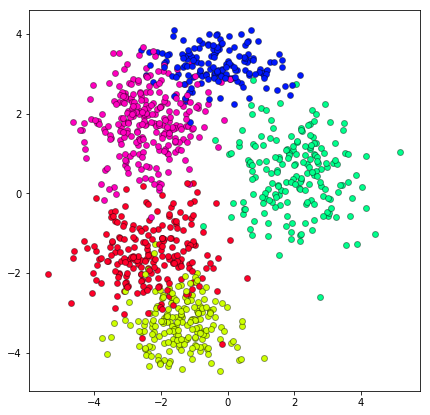

In [9]:
plt.figure(figsize=(7, 7))
for k, x, y in cleaned_data:
    plt.scatter(x, y, c=colors[int(k)], edgecolors='#00000066')

## Training & Predict

In [10]:
training_rdd = cleaned_data_rdd.map(lambda row: row[1:])

In [11]:
clusters = KMeans.train(training_rdd, number_clusters, maxIterations=20, initializationMode="random")

In [12]:
print("SSE is {:.2f}".format(clusters.computeCost(training_rdd)))

SSE is 1507.89


## Visualization output data

Predict the cluster of each point of the sample used for plotting

In [13]:
clustered_data = []
for k, x, y in cleaned_data:
    clustered_data.append((clusters.predict([x, y]),x, y))

Plot the resulting clusters

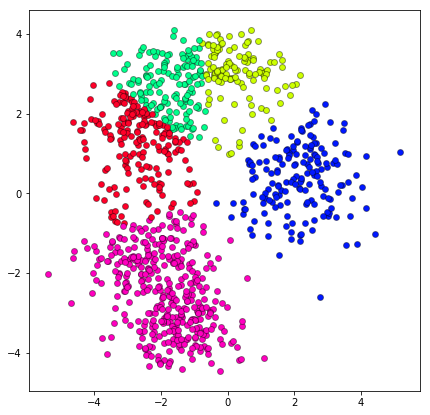

In [14]:
plt.figure(figsize=(7, 7))
for k, x, y in clustered_data:
    plt.scatter(x, y, c=colors[int(k)], edgecolors='#00000066')